In [675]:
#import libraries 
#structures
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D

#get model duration
import time
from datetime import date

#analysis
from sklearn.metrics import confusion_matrix, accuracy_score

In [676]:
#load dataset
dataset = pd.read_csv("winequality-red.csv",sep=';')
dataset.shape

(1599, 12)

In [677]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Cleaning

The dataset has been checked for missing and unreasonable data (i.e. non-numeric, negative) then visualized to check for outliers. 

In [678]:
#check for missing data
dataset.isnull().any().any()

False

In [679]:
#check for unreasonable data
dataset.applymap(np.isreal)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,True,True,True,True,True,True,True,True,True,True,True,True
1595,True,True,True,True,True,True,True,True,True,True,True,True
1596,True,True,True,True,True,True,True,True,True,True,True,True
1597,True,True,True,True,True,True,True,True,True,True,True,True


# Data visualisation

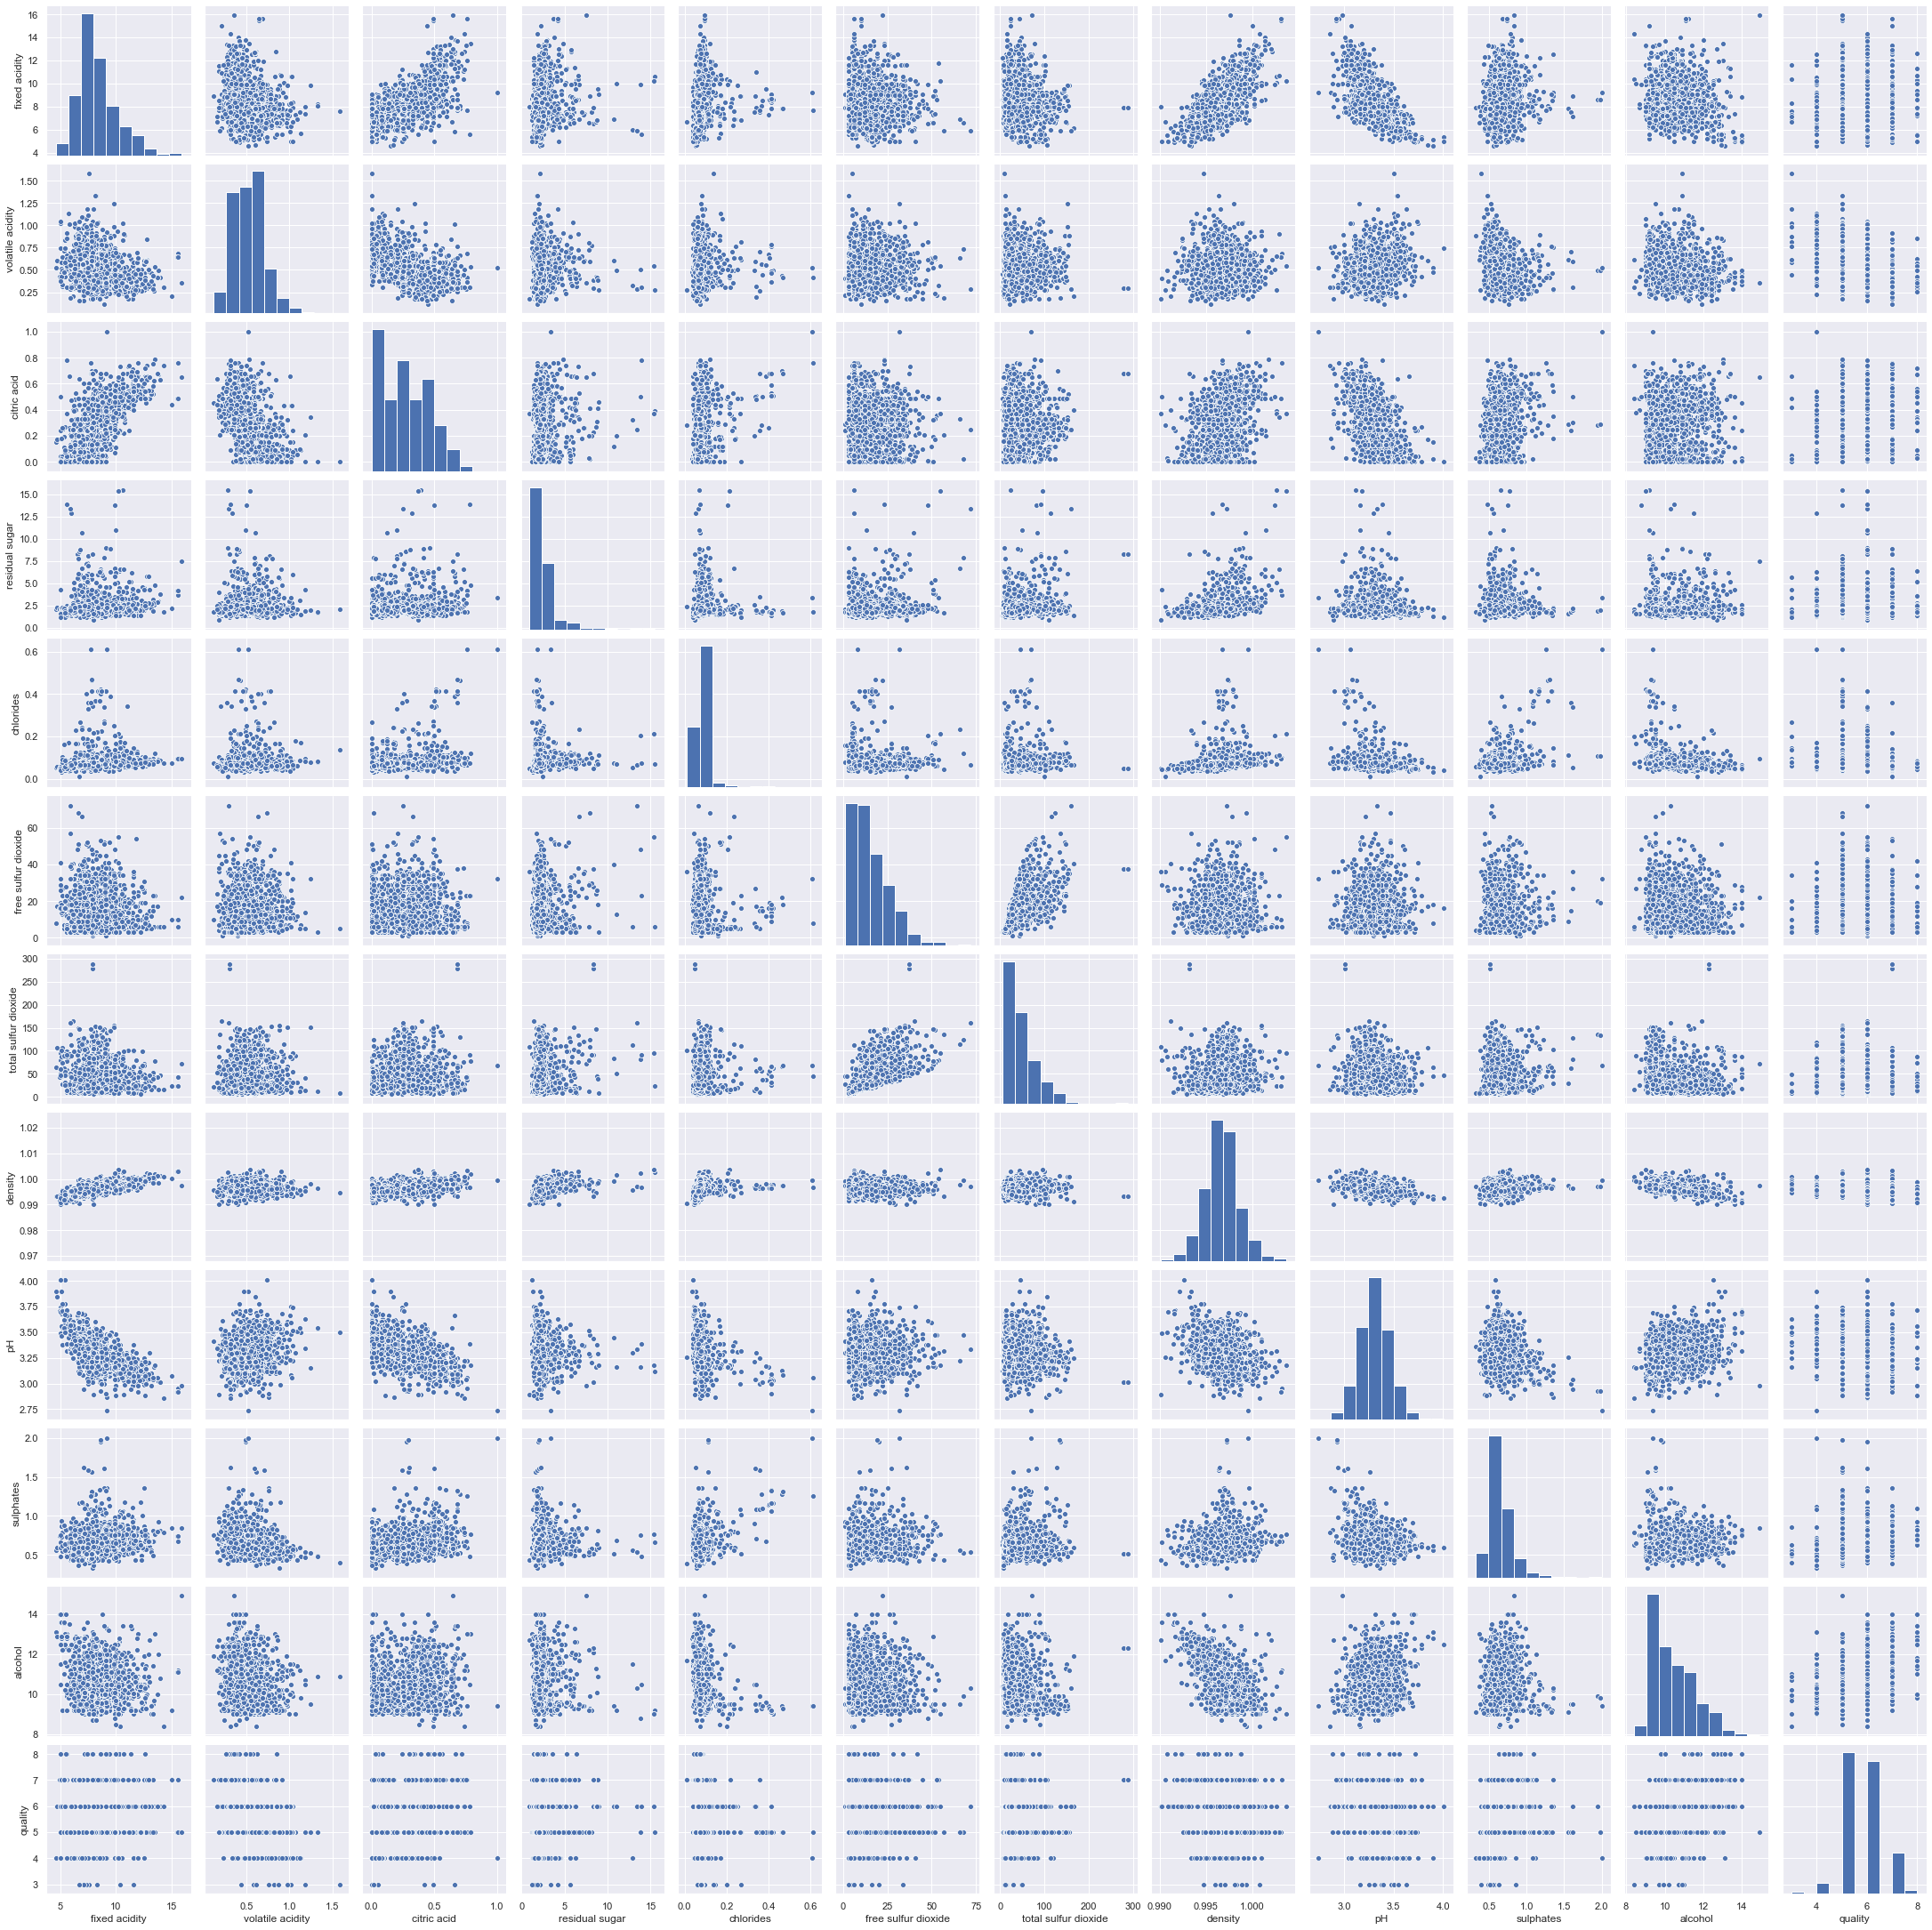

In [680]:
sns_plot = sns.pairplot(dataset)
#sns_plot.savefig('pairplot.jpg')

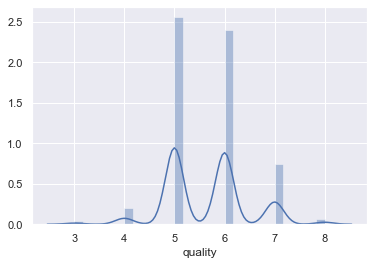

In [681]:
sns_plot = sns.distplot(dataset['quality'])
#sns_plot.savefig('displot.jpg')

In the dataset, only 6 grades of wine quality are present; 3,4,5,6,7,8. From a rating score of 0-10, data only contains scores ranging 3-9; scores on the extreme ends of the scale are not present in the dataset. 

# Pre-processing

Finally, for the purpose of analyzing the dataset using classification models, we included a new column in the dataset; “quality_class”. 

quality_class --> quality<br> 
            1 --> 0-4 <br>
            2 --> 5-6 <br>
            3 --> 7-10 <br>

In [682]:
#create new column; "quality_class"
dataset['quality_class'] = dataset['quality'].apply(lambda value: 1 if value < 5 else 2 if value < 7 else 3)

In [683]:
#set x and y
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = dataset.iloc[:,0:11]
y = dataset['quality_class']
y1 = dataset['quality']

#stadardize data
X_scaled = StandardScaler().fit_transform(X)

#get feature names
X_columns = dataset.columns[:11]

#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaled, y1, random_state=42)

In [684]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


# Feature Engineering

1. Feature selection: Pearson's correlation
2. Feature extraction: Principal component analysis

# 1. Pearson's Correlation

In [685]:
#get correlation map
corr_mat=dataset.corr()

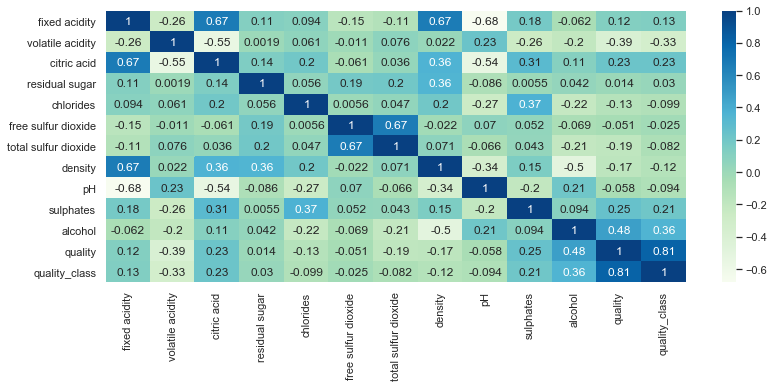

In [686]:
#visualise data
plt.figure(figsize=(13,5))
sns_plot=sns.heatmap(data=corr_mat, annot=True, cmap='GnBu')
plt.show()

#save file
#sns_plot.get_figure().savefig('corr_mat.jpg')

Using a correlation of 0.6 to -0.5 as benchmark, we created a correlation matrix to sieve out features that are highly correlated to the quality of red wine. Our results show that all features are within the acceptable range of 0.6 to -0.5 with the given exception of 'quality_class'

In [687]:
#check for highly correlated values to be removed
target = 'quality'
candidates = corr_mat.index[
    (corr_mat[target] > 0.5) | (corr_mat[target] < -0.5)
].values
candidates = candidates[candidates != target]
print('Correlated to', target, ': ', candidates)

Correlated to quality :  ['quality_class']


Strength of relationship: 

From the heatmap we can tell that most features are weakly correlated to the quality of wine the exception of alcohol (0.48) which is a moderate correlation. 

Direction of relationship: 

Volitile acidity (-0.39), chlorides (-0.13), free sulfur dioxide (-0.051), total sulfur dioxide (-0.19), density (-0.17) and PH (-0.058) are negatively correlated to the quality of wine; as these variables decrease, the quality of wine will increase vice versa. 

Conversely, fixed acidity (0.12), citric acid, residual sugar (0.014), sulphates (0.25) and alcohol (0.48) are positively correlated to the quality of wine; as these variables increase, the quality of wine improves. 

# 2. Principal component analysis

Principal Component analysis (PCA) has also been applied to a few of the models below to reduce the number of dimensionality whilst retaining accuracy.  The n-component(k) was set at 6 to achieve an accuracy of 85.5%. 

In [688]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [689]:
pca = PCA(n_components=6)
pc_X = pca.fit_transform(X_scaled)
pc_columns = ['pc1','pc2','pc3','pc4','pc5','pc6']
print(pca.explained_variance_ratio_.sum())

0.8552471350764369


In [690]:
print(pca.explained_variance_ratio_)

[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439]


In [691]:
#split train and test data for pca
Xpc_train, Xpc_test, ypc_train, ypc_test = train_test_split(pc_X, y, random_state=42)

# Supervised Machine Learning

1. Regression Model<br>
    1.1 Linear Regression<br>
2. Classification Models<br>
    2.1 Logistic Regression<br>
    2.2 K-NN<br>
    2.3 Decision Tree<br>
    2.4 Neural Network<br>

# 1.1 Linear Regression

In [692]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Linear regression with wine quality_class:

In [693]:
# import model
from sklearn.linear_model import LinearRegression

#instantiate
linReg = LinearRegression()

start_time = time.time()
# fit out linear model to the train set data
linReg_model = linReg.fit(X_train, y_train)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0009884834289550781 seconds ---


In [694]:
#get coefficient values with quality_class
coeff_df = pd.DataFrame(linReg.coef_, X_columns, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.019974
volatile acidity,-0.074541
citric acid,-0.001374
residual sugar,0.014896
chlorides,-0.038364
free sulfur dioxide,-0.000780
total sulfur dioxide,-0.008943
density,-0.023491
pH,-0.032613
sulphates,0.051534


The coefficient scores are low for all features

In [695]:
#validate model
y_pred = linReg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)

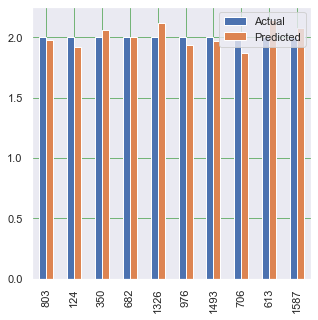

In [696]:
df1.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [697]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.23617289733879598
Mean Squared Error: 0.11806394622320095
Root Mean Squared Error: 0.3436043454661203


The mean square error for the model (0.11) is rather low and indicative of high prediction accuracy. However, this could possibly mean that the model is overfitting.  

The root mean squared error (0.3) is less than 10% of the mean wine quality (5.63), this asserts that the model can make reasonable predictions although not entirely accurate. 

However, we have to keep in mind that the correlations in the model is rather low. 

In [698]:
# print the intercept and coefficients
print('Intercept: ',linReg.intercept_)
print('r2 score: ',linReg.score(X_train, y_train))

Intercept:  2.098448312870218
r2 score:  0.21943170251015087


The R2 (0.21) score is small (i.e. the residuals are big); only 21% of the variance in wine quality_class can be explained by the variables. 

Linear regression with wine quality:

In [811]:
linReg = LinearRegression()
start_time = time.time()
# fit out linear model to the train set data
linReg_model = linReg.fit(X1_train, y1_train)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0019960403442382812 seconds ---


In [812]:
#get coefficient values with quality
coeff_df = pd.DataFrame(linReg.coef_, X_columns, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.038049
volatile acidity,-0.180560
citric acid,-0.026077
residual sugar,0.012487
chlorides,-0.082601
free sulfur dioxide,0.052374
total sulfur dioxide,-0.120170
density,-0.030610
pH,-0.053083
sulphates,0.138922


In [815]:
y1_pred = linReg.predict(X1_test)
df = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df1 = df.head(10)

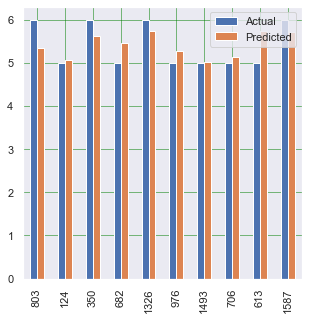

In [701]:
df1.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [702]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Mean Absolute Error: 0.49987991229254447
Mean Squared Error: 0.388301738686892
Root Mean Squared Error: 0.6231386191586042


The mean square error for the model (0.38) is rather low and indicative of high prediction accuracy. It is much higher than when predicting quality_class.<br>

The root mean squared error (0.62) is higher than 10% of the mean wine quality (5.63) as well as that of 'quality'. This asserts that the model might not be a good fit. 

Model is more accurate in predicting quality_class than quality.

In [703]:
# print the intercept and coefficients
print('Intercept: ',linReg.intercept_)
print('r2 score: ',linReg.score(X1_train, y1_train))

Intercept:  5.6339578345154475
r2 score:  0.35485287452056635


The R2 (0.35) score is small but higher than wine quality_class; 35% of the variance in wine quality can be explained by the variables. 

# 1.1.1 Linear regression with PCA

In [800]:
linReg = LinearRegression()
start_time = time.time()
# fit out linear model to the train set data
linReg_model = linReg.fit(Xpc_train, ypc_train)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0009641647338867188 seconds ---


In [807]:
y_pred = linReg.predict(Xpc_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(ypc_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ypc_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ypc_test, y_pred)))

Mean Absolute Error: 0.2371275033034414
Mean Squared Error: 0.11985270311572521
Root Mean Squared Error: 0.346197491492537


In [808]:
# print the intercept and coefficients
print('Intercept: ',linReg.intercept_)
print('r2 score: ',linReg.score(Xpc_train, ypc_train))

Intercept:  2.0980646429760834
r2 score:  0.2082326518753239


# 2. Classification models

We will apply classification techniques to predict the quality of wine (i.e. dependent variable) as a categorical variable. Classification techniques are a form of supervised learning algorithm whereby the training dataset is fed into the algorithm and the accuracy of its prediction is evaluated. It can also be used in Regression Technique to predict the probability of a categorical dependent variable, such that the model predicts P(Y=1) as a function of X. 

The classification models used in this analysis are as follows: 

1. Logistic regression  

2. K-NN 

3. Decision tree  

4. Neural network 

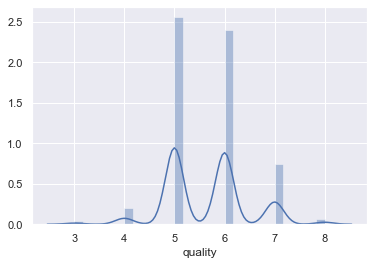

In [704]:
sns_plot = sns.distplot(dataset['quality'])

In [705]:
#the dataset contains 6 unique values.
len(dataset['quality'].unique())

6

# 2.1 Logistics Regression

A Logistic Regression model is built with solver=’lbfgs’ and multi_class=’multinomial’ to account for the 3 categories of wine. Training and testing data sets are created using train_test_split. 25% of the dataset is used for testing and 75% for training. Then the model is fitted to the training data. 

The model can then be used to predict the category of wine from the testing data. Accuracy score and confusion matrix are used to evaluate the model. Accuracy score is the number of correct predictions made by the model over the test data.  

In [706]:
from sklearn.linear_model import LogisticRegression

In [707]:
logReg=LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42)

start_time = time.time()
# Building a Logistic Regression Model
logReg.fit(X_train, y_train)

#print duration of model
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.023926496505737305 seconds ---


In [708]:
# Calculate Accuracy Score
y_pred = logReg.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred))

Accuracy score:  0.845


An accuracy score of 84.5% looks good enough for Logistic Regression model as a classification technique.

In [709]:
#Calculate Confusion Matrix
print('confusion matrix: ','\n',confusion_matrix(y_test,y_pred, labels=[1,2,3]))

confusion matrix:  
 [[  0  14   0]
 [  0 321  12]
 [  0  36  17]]


Even though the accuracy score is high we have to note that for quality_class=1, none were correctly categorized and for qaulity_class=3, only about 47% and 30% (with PCA) were correctly classified. This implies that the model might be better for categorizing moderate quality wine.<br>

This could also be one of the disadvantages of Logistic Regression;  that it requires large amounts of samples. Most samples in this dataset belong to quality_class 2.

# 2.1.1 Logistic Regression with PCA

In [710]:
#apply pca
start_time = time.time()

# Building a Logistic Regression Model
logReg.fit(Xpc_train, ypc_train)

#print duration of model
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.01595783233642578 seconds ---


In [711]:
# Calculate Accuracy Score
y_pred = logReg.predict(Xpc_test)
print('Accuracy score with PCA applied: ', accuracy_score(ypc_test, y_pred))

Accuracy score with PCA applied:  0.8275


In [712]:
# Calculate Confusion Matrix
print('confusion matrix: ','\n',confusion_matrix(ypc_test,y_pred, labels=[1,2,3]))

confusion matrix:  
 [[  0  14   0]
 [  0 318  15]
 [  0  40  13]]


# 2.2 K-NN

In [713]:
from sklearn.neighbors import KNeighborsClassifier

We tested the dataset against the K-nearest neighbor model with n-neighbors=1,3,5,7,9,11,13,15 and retrieved the following accuracy scores.  

In [714]:
#add model duration
k_array = np.arange(1, 17, 2)
for k in k_array:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    print('n_neighbours: ',k)
    print('accuracy score: ',ac)
    print('confusion matrix: ','\n',confusion_matrix(y_test, y_pred))
    print('-------------------------------')

n_neighbours:  1
accuracy score:  0.8375
confusion matrix:  
 [[  4  10   0]
 [ 11 296  26]
 [  0  18  35]]
-------------------------------
n_neighbours:  3
accuracy score:  0.8325
confusion matrix:  
 [[  1  13   0]
 [  3 306  24]
 [  0  27  26]]
-------------------------------
n_neighbours:  5
accuracy score:  0.855
confusion matrix:  
 [[  1  13   0]
 [  3 316  14]
 [  0  28  25]]
-------------------------------
n_neighbours:  7
accuracy score:  0.85
confusion matrix:  
 [[  0  14   0]
 [  2 315  16]
 [  0  28  25]]
-------------------------------
n_neighbours:  9
accuracy score:  0.8475
confusion matrix:  
 [[  0  14   0]
 [  2 315  16]
 [  0  29  24]]
-------------------------------
n_neighbours:  11
accuracy score:  0.8475
confusion matrix:  
 [[  0  14   0]
 [  0 318  15]
 [  1  31  21]]
-------------------------------
n_neighbours:  13
accuracy score:  0.855
confusion matrix:  
 [[  0  14   0]
 [  0 321  12]
 [  0  32  21]]
-------------------------------
n_neighbours:  15
accu

At n-neighbors is 5 and 13, we get the highest accuracy score of 0.855. But to avoid setting n-neighbors too low or too high, we choose n-neighbors=5 to be the best fit.

In [715]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors = 5)
# Build K-nn Model
knn.fit(X_train, y_train)

#print duration of model
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.003957986831665039 seconds ---


# 2.2.1 K-NN with PCA

In [716]:
#apply pca
k_array = np.arange(1, 17, 2)
for k in k_array:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Xpc_train, ypc_train)
    y_pred=knn.predict(Xpc_test)
    ac = accuracy_score(ypc_test, y_pred)
    print('n_neighbours: ',k)
    print('accuracy score: ',ac)
    print('confusion matrix: ','\n',confusion_matrix(ypc_test, y_pred))
    print('-------------------------------')

n_neighbours:  1
accuracy score:  0.825
confusion matrix:  
 [[  4  10   0]
 [ 14 294  25]
 [  0  21  32]]
-------------------------------
n_neighbours:  3
accuracy score:  0.83
confusion matrix:  
 [[  0  14   0]
 [  4 307  22]
 [  0  28  25]]
-------------------------------
n_neighbours:  5
accuracy score:  0.8575
confusion matrix:  
 [[  0  14   0]
 [  1 319  13]
 [  0  29  24]]
-------------------------------
n_neighbours:  7
accuracy score:  0.8475
confusion matrix:  
 [[  1  13   0]
 [  0 320  13]
 [  0  35  18]]
-------------------------------
n_neighbours:  9
accuracy score:  0.8375
confusion matrix:  
 [[  0  14   0]
 [  0 320  13]
 [  0  38  15]]
-------------------------------
n_neighbours:  11
accuracy score:  0.85
confusion matrix:  
 [[  0  14   0]
 [  0 323  10]
 [  0  36  17]]
-------------------------------
n_neighbours:  13
accuracy score:  0.845
confusion matrix:  
 [[  0  14   0]
 [  0 323  10]
 [  0  38  15]]
-------------------------------
n_neighbours:  15
accura

When PCA is applied to the model, we get the highest accuracy score of 0.8575 at n-neighbors=5.

In [717]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors = 5)
# Build K-nn Model
knn.fit(Xpc_train, ypc_train)

#print duration of model
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.00299072265625 seconds ---


# 2.3 Decision tree

In [718]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [719]:
#train model
start_time = time.time()
dt.fit(X_train,y_train)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.008975982666015625 seconds ---


In [720]:
# Calculate Accuracy Score
dt_predict = dt.predict(X_test)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_acc_score)

0.8225


In [721]:
# Calculate Confusion Matrix
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
print('confusion matrix: ','\n',dt_conf_matrix)

confusion matrix:  
 [[  7   7   0]
 [ 17 286  30]
 [  1  16  36]]


In [722]:
#training with Gini
def decTreeScore2(crit = 'gini',  maxDepth = 2, minSamples = 1, minSplit = 2):
    dect = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, min_samples_leaf = minSamples, 
                                 min_samples_split = minSplit, random_state= 42)
    dect.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, dect.predict(X_test))
    print(accuracy)
    return accuracy

In [723]:
start_time=time.time()
decTreeScore2()
today=date.today()
print("---%s seconds---"% (time.time()-start_time))

0.84
---0.0019943714141845703 seconds---


In [724]:
decTreeScore2(crit = 'entropy')
#if we use entropy to calculate infomation gain instead of gini score, the accuracy drops

0.84


0.84

In [725]:
# find the max allowed depth for the decision tree
for i in np.arange(1, 15, 1):
    decTreeScore2(maxDepth = i)

0.8325
0.84
0.8475
0.84
0.84
0.83
0.8325
0.835
0.8275
0.84
0.8325
0.82
0.815
0.8275


In [726]:
# find maximum_samples leaf of the tree
for i in np.arange(1, 10, 1):
    decTreeScore2(minSamples = i)

0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84


In [727]:
# find minimum_samples_split of the tree
for i in np.arange(2, 10,1):
    decTreeScore2(minSplit = i)

0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84


In [728]:
# decision tree model
# import graphviz and sklearn.tree
from sklearn import tree
import graphviz
from graphviz import Source

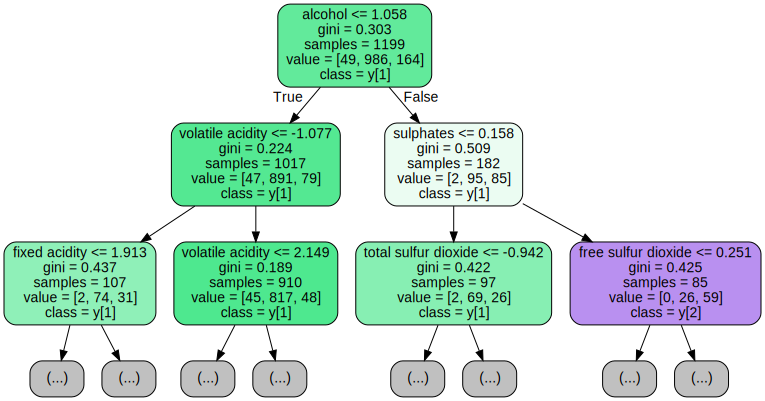

In [729]:
dot_data = tree.export_graphviz(dt, out_file=None, max_depth=2,class_names=True,feature_names= X_columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data) 
graph

# 2.3.1 Decision tree with PCA

In [730]:
#apply pca
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(Xpc_train, ypc_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [731]:
#training with Gini
def decTreeScore2(crit = 'gini',  maxDepth = 2, minSamples = 1, minSplit = 2):
    dect = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, min_samples_leaf = minSamples, 
                                 min_samples_split = minSplit, random_state= 42)
    dect.fit(Xpc_train, ypc_train)
    accuracy = accuracy_score(ypc_test, dect.predict(Xpc_test))
    print(accuracy)
    return accuracy

In [732]:
start_time=time.time()
decTreeScore2()
today=date.today()
print("---%s seconds---"% (time.time()-start_time))

0.8075
---0.004987478256225586 seconds---


In [733]:
decTreeScore2(crit = 'entropy')
#if we use entropy to calculate infomation gain instead of gini score, the accuracy drops

0.795


0.795

In [734]:
# use different maximum depth of the tree
for i in np.arange(1, 15, 1):
    decTreeScore2(maxDepth = i)

0.8325
0.8075
0.82
0.8125
0.83
0.8175
0.8275
0.8125
0.8275
0.8225
0.825
0.8225
0.835
0.82


In [735]:
# use different maximum_samples leaf of the tree
for i in np.arange(1, 10, 1):
    decTreeScore2(minSamples = i)

0.8075
0.8075
0.8075
0.8075
0.8075
0.8075
0.8075
0.8075
0.8075


In [736]:
# use different minimum_samples_split of the tree
for i in np.arange(2, 10,1):
    decTreeScore2(minSplit = i)

0.8075
0.8075
0.8075
0.8075
0.8075
0.8075
0.8075
0.8075


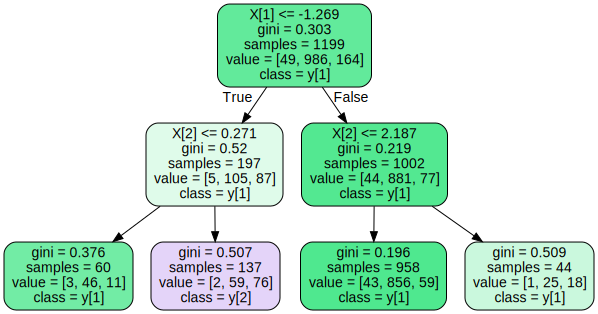

In [737]:
dot_data = tree.export_graphviz(dt, out_file=None, max_depth=2,class_names=True, filled=True, rounded=True)
graph = graphviz.Source(dot_data) 
graph

# 2.4 Neural Network

Neural Network also known as Deep Learning is a type of machine learning with a series of algorithms used to identify relationship in a given data set. For this assignment we will be using Karen library to construct a Neural Network used to estimate the quality of wine in our chosen data set.

In [738]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [739]:
#In this step we will be importing and preparing dataset that is to be analyzed, in this case we will be using
#‘winequality-red.csv’ dataset. 
#dataset = pd.read_csv('winequality-red.csv',sep=';')
#datasetn = dataset
#dataset['quality_class'] = dataset['quality'].apply(lambda value: 1 if value < 5 else 2 if value < 7 else 3)
#dataset['quality_class'] = pd.Categorical(dataset['quality_class'], categories=[1,2,3])
#dataset['quality_class'] = dataset['quality_class'].astype(int)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [740]:
quality_label_sums= dataset['quality_class'].value_counts()
quality_label_percentage = quality_label_sums/len('quality_class')
print(quality_label_sums)
print(quality_label_percentage)

2    1319
3     217
1      63
Name: quality_class, dtype: int64
2    101.461538
3     16.692308
1      4.846154
Name: quality_class, dtype: float64


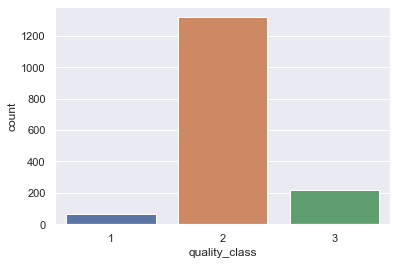

In [741]:
#visualize quality_class
j = sns.countplot(x='quality_class', data=dataset)
plt.show(j)

In [742]:
datasetn=dataset
datasetn['quality_class'] = datasetn['quality_class'].astype(int)
datasetn = pd.get_dummies(datasetn, columns=['quality_class'])
datasetn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class_1,quality_class_2,quality_class_3
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1,0


Next we are going to determine the input and output variable of our dataset. We will also be doing scaling of feature using StandardScaler() function in sklearn library to ensure that our data is arranged in a standard normal distribution with mean of 0 and standard deviation of 1.

In [743]:
Xn = datasetn.iloc[:,0:11].values
Yn = datasetn.iloc[:,12:15].values

Xn = StandardScaler().fit_transform(Xn)

Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(Xn, Yn,random_state=42)

print(Xn_train.shape, Yn_train.shape, Xn_test.shape, Yn_test.shape)

(1199, 11) (1199, 3) (400, 11) (400, 3)


After preparing our dataset, we will be moving on to create our Neural Network model using keras library that will be used to determine wine quality.
1. we are going to use Sequential class from keras.models to allow us to define all of the layer in constructor. 
2. we are going to use Dense from keras.layers, to allow us to run our model operation.

In [744]:
model = Sequential()
model.add(Dense(500, input_dim=11, activation='sigmoid'))
model.add(Dense(500, activation='sigmoid'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

In [745]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 500)               6000      
_________________________________________________________________
dense_74 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_75 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_76 (Dense)             (None, 3)                 903       
Total params: 407,703
Trainable params: 407,703
Non-trainable params: 0
_________________________________________________________________


In [746]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ["accuracy"])

start_time = time.time()
#train model
history = model.fit(x = Xn_train, y = Yn_train,batch_size=32, epochs = 75,verbose=1,validation_data=(Xn_test, Yn_test))

#get model training duration
today= date.today()
print('---%s seconds---'%(time.time()-start_time))

Train on 1199 samples, validate on 400 samples
Epoch 1/75
1199/1199 [==============================] - 1s 418us/step - loss: 0.6042 - accuracy: 0.8023 - val_loss: 0.5465 - val_accuracy: 0.8325
Epoch 2/75
1199/1199 [==============================] - 0s 179us/step - loss: 0.5656 - accuracy: 0.8224 - val_loss: 0.4913 - val_accuracy: 0.8325
Epoch 3/75
1199/1199 [==============================] - 0s 180us/step - loss: 0.5088 - accuracy: 0.8215 - val_loss: 0.4450 - val_accuracy: 0.8325
Epoch 4/75
1199/1199 [==============================] - 0s 216us/step - loss: 0.4660 - accuracy: 0.8332 - val_loss: 0.4274 - val_accuracy: 0.8300
Epoch 5/75
1199/1199 [==============================] - 0s 168us/step - loss: 0.4606 - accuracy: 0.8299 - val_loss: 0.4072 - val_accuracy: 0.8425
Epoch 6/75
1199/1199 [==============================] - 0s 175us/step - loss: 0.4549 - accuracy: 0.8399 - val_loss: 0.4112 - val_accuracy: 0.8450
Epoch 7/75
1199/1199 [==============================] - 0s 166us/step - loss:

In [747]:
# Calculation of Loss and Accuracy metrics
loss, accuracy = model.evaluate(Xn_test, Yn_test)
print('loss: ', loss, ', accuracy: ', accuracy)

400/400 [==============================] - 0s 65us/step
loss:  0.38239470481872556 , accuracy:  0.8199999928474426


In [748]:
predictions = model.predict(Xn_test)
print('\nPrediction:')
for i in np.arange(len(predictions)):
    print('Actual: ', Yn_test[i], ', Predicted: ', predictions[i])

predictions=np.argmax(predictions, axis=1)
Yn_test = np.argmax(Yn_test, axis=1)


Prediction:
Actual:  [0 1 0] , Predicted:  [0.02188107 0.965189   0.01292993]
Actual:  [0 1 0] , Predicted:  [3.0786075e-02 9.6825266e-01 9.6129451e-04]
Actual:  [0 1 0] , Predicted:  [0.02735753 0.9003858  0.07225677]
Actual:  [0 1 0] , Predicted:  [0.02470807 0.9598358  0.01545614]
Actual:  [0 1 0] , Predicted:  [0.0252823  0.8925441  0.08217349]
Actual:  [0 1 0] , Predicted:  [0.02798291 0.96681666 0.00520043]
Actual:  [0 1 0] , Predicted:  [2.0574857e-02 9.7910094e-01 3.2421618e-04]
Actual:  [0 1 0] , Predicted:  [0.32801738 0.6659913  0.00599127]
Actual:  [0 1 0] , Predicted:  [0.01853361 0.886465   0.09500138]
Actual:  [0 1 0] , Predicted:  [0.03272161 0.8769716  0.09030683]
Actual:  [0 0 1] , Predicted:  [0.014896   0.51884395 0.46626008]
Actual:  [1 0 0] , Predicted:  [0.13899934 0.8387671  0.02223356]
Actual:  [0 1 0] , Predicted:  [0.01993747 0.93331164 0.04675082]
Actual:  [0 1 0] , Predicted:  [0.0238094  0.967726   0.00846454]
Actual:  [0 1 0] , Predicted:  [0.02099142 0.

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


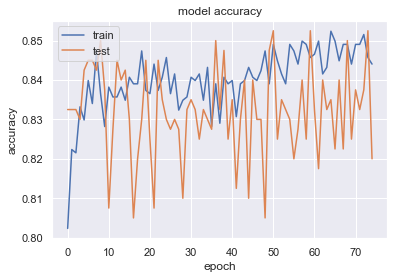

In [749]:
# Training History - Model Accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


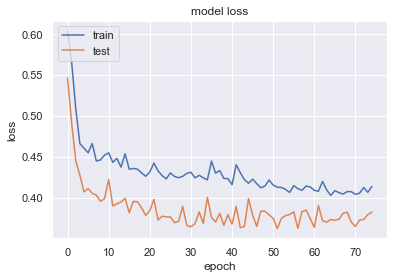

In [750]:
# Training History - Loss Accuracy
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [751]:
#Calculation of confusion matrix
#from sklearn.metrics import confusion_matrix
confusion_matrix(Yn_test, predictions)

array([[  0,  14,   0],
       [  0, 303,  30],
       [  0,  28,  25]], dtype=int64)

# 2.4.1 Neural Network with PCA

In [752]:
Y = datasetn.iloc[:,12:15].values

Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(pc_X, Y, random_state=42)

print(Xn_train.shape, Yn_train.shape, Xn_test.shape, Yn_test.shape)

(1199, 6) (1199, 3) (400, 6) (400, 3)


In [753]:
model = Sequential()
model.add(Dense(500, input_dim=6, activation='sigmoid'))
model.add(Dense(500, activation='sigmoid'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

In [754]:

model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ["accuracy"])

start_time = time.time()
history = model.fit(x = Xn_train, y = Yn_train,batch_size=128, epochs = 800,verbose=1,validation_data=(Xn_test, Yn_test))

today= date.today()
print('---%s seconds---'%(time.time()-start_time))

Train on 1199 samples, validate on 400 samples
Epoch 1/800
1199/1199 [==============================] - 0s 309us/step - loss: 0.8294 - accuracy: 0.7548 - val_loss: 0.5666 - val_accuracy: 0.8325
Epoch 2/800
1199/1199 [==============================] - 0s 59us/step - loss: 0.5988 - accuracy: 0.8224 - val_loss: 0.5401 - val_accuracy: 0.8325
Epoch 3/800
1199/1199 [==============================] - 0s 58us/step - loss: 0.5827 - accuracy: 0.8224 - val_loss: 0.5318 - val_accuracy: 0.8325
Epoch 4/800
1199/1199 [==============================] - 0s 63us/step - loss: 0.5595 - accuracy: 0.8224 - val_loss: 0.5290 - val_accuracy: 0.8325
Epoch 5/800
1199/1199 [==============================] - 0s 58us/step - loss: 0.5622 - accuracy: 0.8224 - val_loss: 0.5286 - val_accuracy: 0.8325
Epoch 6/800
1199/1199 [==============================] - 0s 56us/step - loss: 0.5510 - accuracy: 0.8224 - val_loss: 0.5196 - val_accuracy: 0.8325
Epoch 7/800
1199/1199 [==============================] - 0s 55us/step - loss

Epoch 112/800
1199/1199 [==============================] - 0s 63us/step - loss: 0.4220 - accuracy: 0.8457 - val_loss: 0.3740 - val_accuracy: 0.8275
Epoch 113/800
1199/1199 [==============================] - 0s 59us/step - loss: 0.4225 - accuracy: 0.8432 - val_loss: 0.3760 - val_accuracy: 0.8275
Epoch 114/800
1199/1199 [==============================] - 0s 58us/step - loss: 0.4230 - accuracy: 0.8449 - val_loss: 0.3740 - val_accuracy: 0.8275
Epoch 115/800
1199/1199 [==============================] - 0s 59us/step - loss: 0.4226 - accuracy: 0.8424 - val_loss: 0.3775 - val_accuracy: 0.8275
Epoch 116/800
1199/1199 [==============================] - 0s 57us/step - loss: 0.4280 - accuracy: 0.8315 - val_loss: 0.3756 - val_accuracy: 0.8300
Epoch 117/800
1199/1199 [==============================] - 0s 59us/step - loss: 0.4234 - accuracy: 0.8407 - val_loss: 0.3742 - val_accuracy: 0.8225
Epoch 118/800
1199/1199 [==============================] - 0s 58us/step - loss: 0.4216 - accuracy: 0.8415 - val_

1199/1199 [==============================] - 0s 69us/step - loss: 0.4127 - accuracy: 0.8457 - val_loss: 0.3732 - val_accuracy: 0.8325
Epoch 223/800
1199/1199 [==============================] - 0s 71us/step - loss: 0.4020 - accuracy: 0.8449 - val_loss: 0.3740 - val_accuracy: 0.8300
Epoch 224/800
1199/1199 [==============================] - 0s 75us/step - loss: 0.3974 - accuracy: 0.8490 - val_loss: 0.3652 - val_accuracy: 0.8350
Epoch 225/800
1199/1199 [==============================] - 0s 64us/step - loss: 0.3987 - accuracy: 0.8482 - val_loss: 0.3722 - val_accuracy: 0.8400
Epoch 226/800
1199/1199 [==============================] - 0s 67us/step - loss: 0.4012 - accuracy: 0.8449 - val_loss: 0.3749 - val_accuracy: 0.8325
Epoch 227/800
1199/1199 [==============================] - 0s 68us/step - loss: 0.3998 - accuracy: 0.8449 - val_loss: 0.3747 - val_accuracy: 0.8325
Epoch 228/800
1199/1199 [==============================] - 0s 66us/step - loss: 0.3999 - accuracy: 0.8474 - val_loss: 0.3673 -

1199/1199 [==============================] - 0s 70us/step - loss: 0.3354 - accuracy: 0.8682 - val_loss: 0.3929 - val_accuracy: 0.8350
Epoch 333/800
1199/1199 [==============================] - 0s 75us/step - loss: 0.3351 - accuracy: 0.8674 - val_loss: 0.3920 - val_accuracy: 0.8250
Epoch 334/800
1199/1199 [==============================] - 0s 67us/step - loss: 0.3339 - accuracy: 0.8732 - val_loss: 0.3954 - val_accuracy: 0.8275
Epoch 335/800
1199/1199 [==============================] - 0s 74us/step - loss: 0.3313 - accuracy: 0.8716 - val_loss: 0.3883 - val_accuracy: 0.8375
Epoch 336/800
1199/1199 [==============================] - 0s 72us/step - loss: 0.3305 - accuracy: 0.8716 - val_loss: 0.3972 - val_accuracy: 0.8350
Epoch 337/800
1199/1199 [==============================] - 0s 80us/step - loss: 0.3304 - accuracy: 0.8707 - val_loss: 0.3953 - val_accuracy: 0.8325
Epoch 338/800
1199/1199 [==============================] - 0s 73us/step - loss: 0.3298 - accuracy: 0.8732 - val_loss: 0.3936 -

1199/1199 [==============================] - 0s 74us/step - loss: 0.2230 - accuracy: 0.9149 - val_loss: 0.4552 - val_accuracy: 0.8400
Epoch 443/800
1199/1199 [==============================] - 0s 77us/step - loss: 0.2227 - accuracy: 0.9149 - val_loss: 0.4788 - val_accuracy: 0.8225
Epoch 444/800
1199/1199 [==============================] - 0s 74us/step - loss: 0.2244 - accuracy: 0.9133 - val_loss: 0.4607 - val_accuracy: 0.8400
Epoch 445/800
1199/1199 [==============================] - 0s 81us/step - loss: 0.2189 - accuracy: 0.9199 - val_loss: 0.4720 - val_accuracy: 0.8425
Epoch 446/800
1199/1199 [==============================] - 0s 88us/step - loss: 0.2186 - accuracy: 0.9216 - val_loss: 0.4621 - val_accuracy: 0.8300
Epoch 447/800
1199/1199 [==============================] - 0s 84us/step - loss: 0.2184 - accuracy: 0.9158 - val_loss: 0.4731 - val_accuracy: 0.8325
Epoch 448/800
1199/1199 [==============================] - 0s 91us/step - loss: 0.2143 - accuracy: 0.9141 - val_loss: 0.4660 -

1199/1199 [==============================] - 0s 72us/step - loss: 0.1167 - accuracy: 0.9608 - val_loss: 0.6865 - val_accuracy: 0.8375
Epoch 553/800
1199/1199 [==============================] - 0s 69us/step - loss: 0.1090 - accuracy: 0.9633 - val_loss: 0.7062 - val_accuracy: 0.8175
Epoch 554/800
1199/1199 [==============================] - 0s 73us/step - loss: 0.1091 - accuracy: 0.9691 - val_loss: 0.7032 - val_accuracy: 0.8325
Epoch 555/800
1199/1199 [==============================] - 0s 90us/step - loss: 0.1093 - accuracy: 0.9625 - val_loss: 0.7222 - val_accuracy: 0.8000
Epoch 556/800
1199/1199 [==============================] - 0s 77us/step - loss: 0.1299 - accuracy: 0.9525 - val_loss: 0.6889 - val_accuracy: 0.8375
Epoch 557/800
1199/1199 [==============================] - 0s 82us/step - loss: 0.1100 - accuracy: 0.9633 - val_loss: 0.7104 - val_accuracy: 0.8325
Epoch 558/800
1199/1199 [==============================] - 0s 80us/step - loss: 0.1152 - accuracy: 0.9591 - val_loss: 0.7161 -

1199/1199 [==============================] - 0s 83us/step - loss: 0.0495 - accuracy: 0.9825 - val_loss: 0.9024 - val_accuracy: 0.8425
Epoch 663/800
1199/1199 [==============================] - 0s 77us/step - loss: 0.0467 - accuracy: 0.9858 - val_loss: 0.9273 - val_accuracy: 0.8350
Epoch 664/800
1199/1199 [==============================] - 0s 83us/step - loss: 0.0479 - accuracy: 0.9842 - val_loss: 0.9588 - val_accuracy: 0.8050
Epoch 665/800
1199/1199 [==============================] - 0s 81us/step - loss: 0.0505 - accuracy: 0.9875 - val_loss: 0.9106 - val_accuracy: 0.8375
Epoch 666/800
1199/1199 [==============================] - 0s 86us/step - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.9140 - val_accuracy: 0.8375
Epoch 667/800
1199/1199 [==============================] - 0s 82us/step - loss: 0.0427 - accuracy: 0.9883 - val_loss: 0.9568 - val_accuracy: 0.8325
Epoch 668/800
1199/1199 [==============================] - 0s 83us/step - loss: 0.0444 - accuracy: 0.9892 - val_loss: 0.9216 -

1199/1199 [==============================] - 0s 86us/step - loss: 0.0178 - accuracy: 0.9958 - val_loss: 1.1794 - val_accuracy: 0.8325
Epoch 773/800
1199/1199 [==============================] - 0s 81us/step - loss: 0.0172 - accuracy: 0.9975 - val_loss: 1.1564 - val_accuracy: 0.8125
Epoch 774/800
1199/1199 [==============================] - 0s 82us/step - loss: 0.0196 - accuracy: 0.9967 - val_loss: 1.1521 - val_accuracy: 0.8400
Epoch 775/800
1199/1199 [==============================] - 0s 91us/step - loss: 0.0214 - accuracy: 0.9958 - val_loss: 1.1747 - val_accuracy: 0.8375
Epoch 776/800
1199/1199 [==============================] - 0s 87us/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 1.1496 - val_accuracy: 0.8400
Epoch 777/800
1199/1199 [==============================] - 0s 80us/step - loss: 0.0209 - accuracy: 0.9950 - val_loss: 1.2161 - val_accuracy: 0.8050
Epoch 778/800
1199/1199 [==============================] - 0s 79us/step - loss: 0.0223 - accuracy: 0.9925 - val_loss: 1.1640 -

In [755]:
# Calculation of Loss and Accuracy metrics
loss, accuracy = model.evaluate(Xn_test, Yn_test)
print('loss: ', loss, ', accuracy: ', accuracy)

400/400 [==============================] - 0s 80us/step
loss:  1.1596495532989501 , accuracy:  0.8075000047683716


In [757]:
predictions = model.predict(Xn_test)
print('\nPrediction:')
for i in np.arange(len(predictions)):
    print('Actual: ', Yn_test[i], ', Predicted: ', predictions[i])
    
predictions=np.argmax(predictions, axis=1)
Yn_test = np.argmax(Yn_test, axis=1)


Prediction:
Actual:  [0 1 0] , Predicted:  [4.8334567e-07 9.9938238e-01 6.1708916e-04]
Actual:  [0 1 0] , Predicted:  [4.3337743e-14 1.0000000e+00 8.9011992e-11]
Actual:  [0 1 0] , Predicted:  [1.1623578e-09 9.9999964e-01 3.4103573e-07]
Actual:  [0 1 0] , Predicted:  [6.5290928e-12 1.0000000e+00 6.0339254e-11]
Actual:  [0 1 0] , Predicted:  [6.8409440e-06 9.8227465e-01 1.7718552e-02]
Actual:  [0 1 0] , Predicted:  [2.6096140e-14 1.0000000e+00 1.5609573e-11]
Actual:  [0 1 0] , Predicted:  [9.6483236e-16 1.0000000e+00 3.8891313e-13]
Actual:  [0 1 0] , Predicted:  [5.7128114e-01 4.2859265e-01 1.2617644e-04]
Actual:  [0 1 0] , Predicted:  [3.7665805e-07 7.2693723e-01 2.7306241e-01]
Actual:  [0 1 0] , Predicted:  [3.3965517e-07 5.9275523e-02 9.4072407e-01]
Actual:  [0 0 1] , Predicted:  [5.978914e-11 7.927906e-04 9.992072e-01]
Actual:  [1 0 0] , Predicted:  [4.6289358e-03 9.9520689e-01 1.6415854e-04]
Actual:  [0 1 0] , Predicted:  [2.3595314e-05 9.9997556e-01 8.7752960e-07]
Actual:  [0 1 0

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


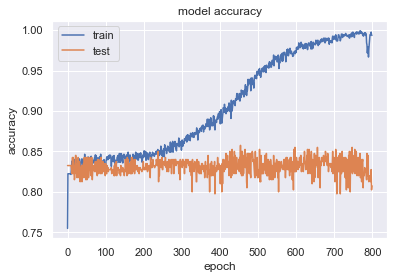

In [758]:
# Training History - Model Accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


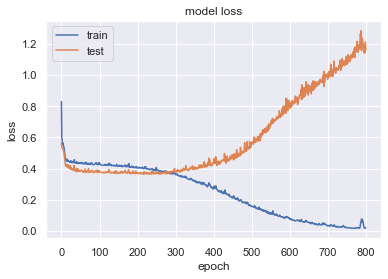

In [759]:
# Training History - Loss Accuracy
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [760]:
#Calculation of confusion matrix
confusion_matrix(Yn_test, predictions)

array([[  2,  11,   1],
       [ 15, 287,  31],
       [  1,  18,  34]], dtype=int64)

# Unsupervised Machine Learning

We will apply 2 clustering ML models to the dataset to try uncover possible clusters.

1. K-Means (centriod based)
2. Hierarchical Agglomerative Clustering (similarity based)
3. Dbscan (density based)

In [ ]:
#dataset.head()

# 1. K-means

In [761]:
#import libraries
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans

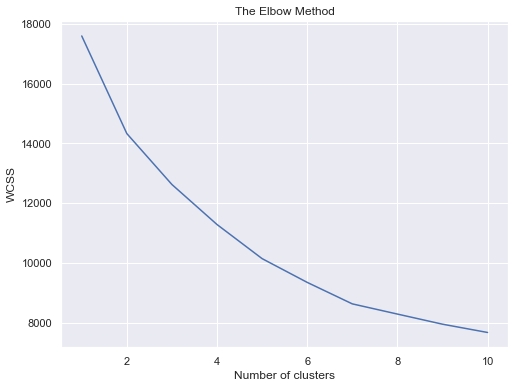

In [762]:
#try to find optimal k using the elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the graph above, we can see a dip ar 2, that's our elbow (i.e. k=2)

In [763]:
#Applying kmeans to the dataset, set k=2
kmeans = KMeans(n_clusters = 2)
start_time = time.time()
clusters = kmeans.fit_predict(X_scaled)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))
labels = kmeans.labels_

--- 0.06180143356323242 seconds ---


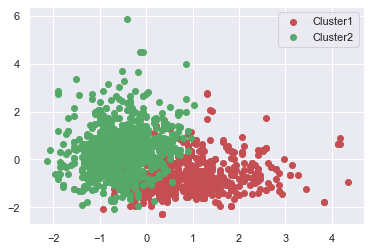

In [764]:
#2D plot
colors = 'rgbkcmy'
for i in np.unique(clusters):
    plt.scatter(X_scaled[clusters==i,0],
               X_scaled[clusters==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.legend()

Text(0.5, 0.92, 'K=2: Acidity, Sugar, Alcohol')

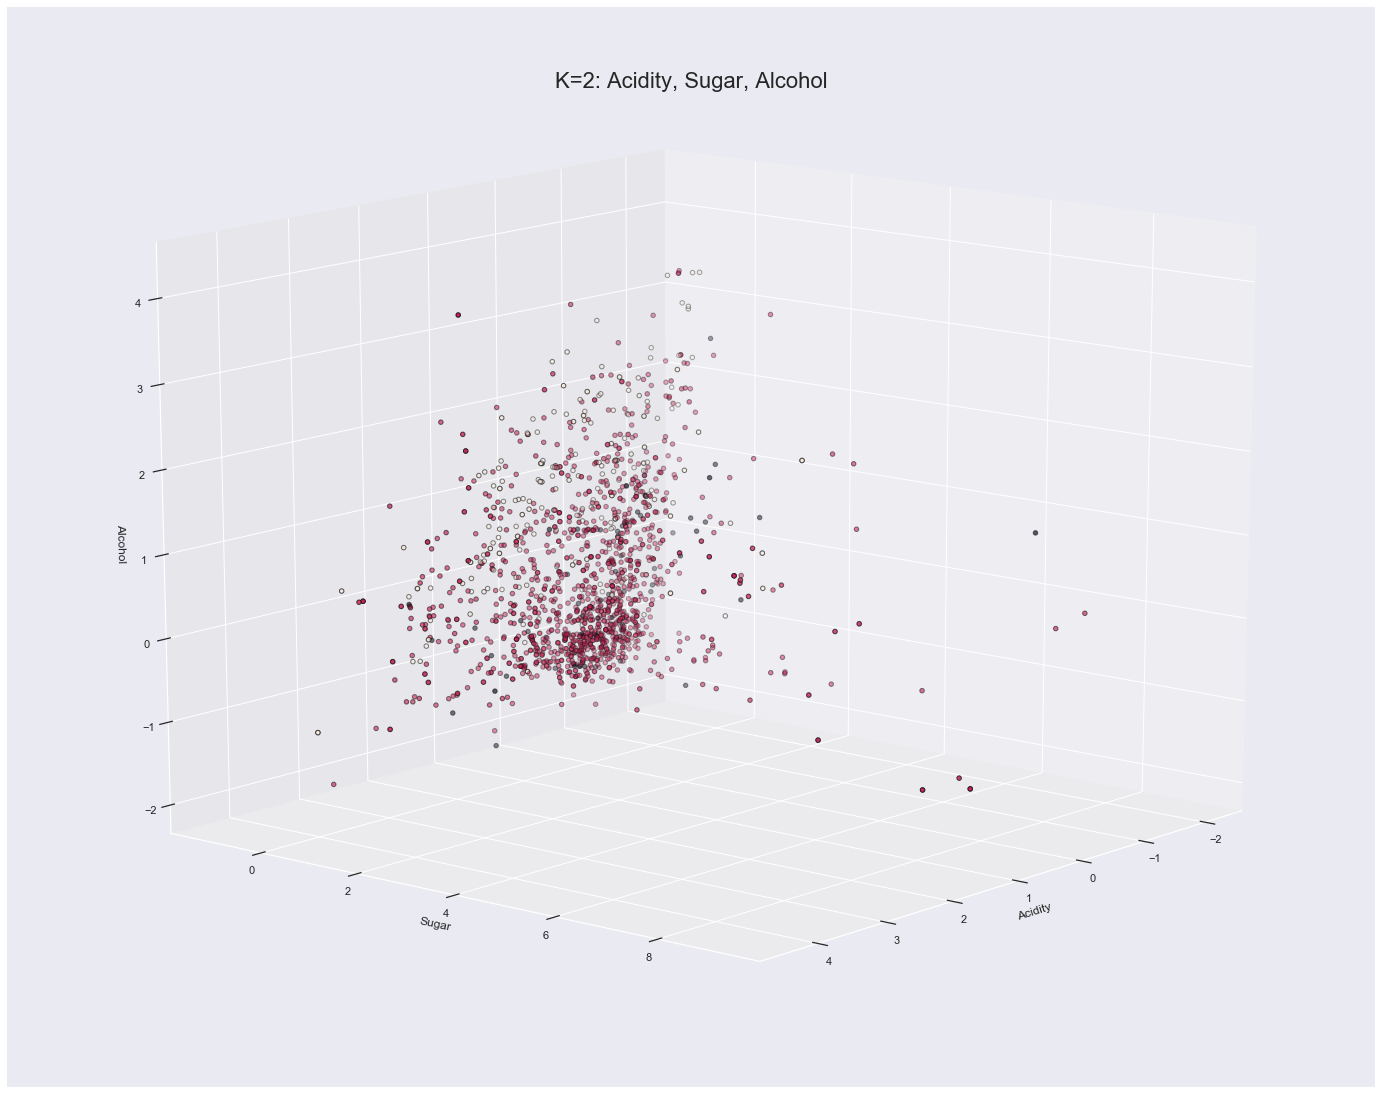

In [765]:
# Visualise the clusterds considerig fixed acidity, residual sugar, and alcohol
fig = plt.figure(figsize=(20, 15))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=40)

ax.scatter(X_scaled[:,0], X_scaled[:,3], X_scaled[:,10],c=y, edgecolor='k')
ax.set_xlabel('Acidity')
ax.set_ylabel('Sugar')
ax.set_zlabel('Alcohol')
ax.set_title('K=2: Acidity, Sugar, Alcohol', size=22)

In [766]:
#evaluate model
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.2139417458782135

The silhoulette score is rather low, indicating overlapping clusters; Clusters are not dense nor well separated.

In [767]:
kmeans.inertia_

14330.14246020497

We can see here that in the inertia for this model is extremely high (14330), this might be indicative of the "curse of dimensionality". As such, we will explore this model again using PCA.

# 1.1 K-means with PCA

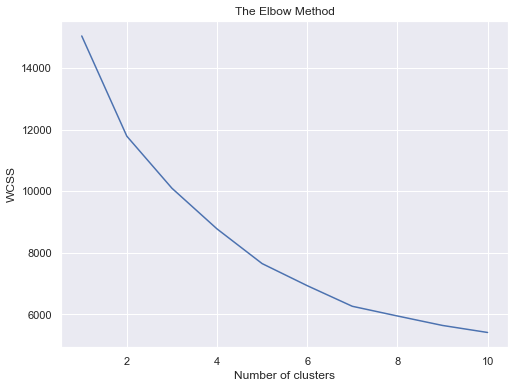

In [817]:
#try to find optimal k using the elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(pc_X)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [768]:
#Applying kmeans to the dataset, set k=2
kmeans = KMeans(n_clusters = 2)
start_time = time.time()
clusters = kmeans.fit_predict(pc_X)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))
labels = kmeans.labels_

--- 0.04089212417602539 seconds ---


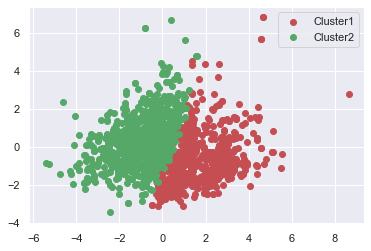

In [769]:
#2D plot
colors = 'rgbkcmy'
for i in np.unique(clusters):
    plt.scatter(pc_X[clusters==i,0],
               pc_X[clusters==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.legend()

In [770]:
#evaluate model
metrics.silhouette_score(pc_X, labels, metric='euclidean')

0.24568699712671527

Althoough the silhouette score increased with pca, it still low; clusters are overlapping or incorrectly grouped. 

In [771]:
kmeans.inertia_

11788.84873851936

inertia also decreased but remains high.

# 2. Agglormerative Clustering

Apply agglomerative clustering to pick the best number of clusters, we need to draw the dendrogram graph

In [772]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

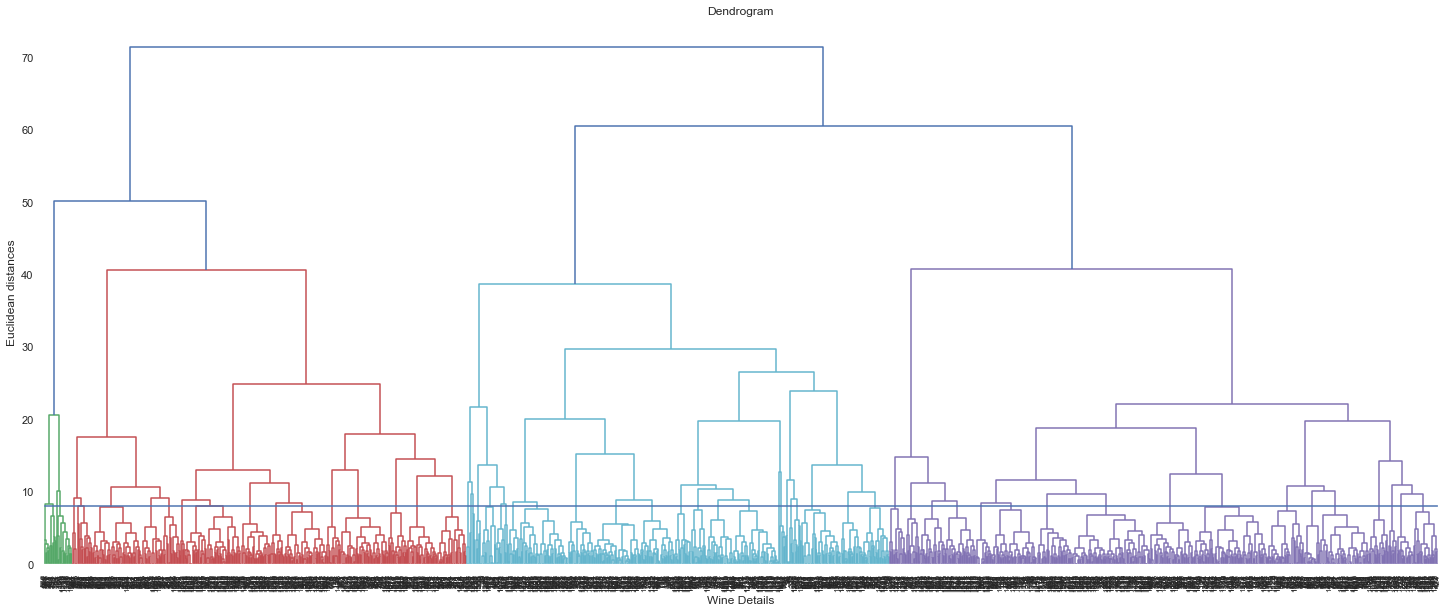

<Figure size 432x288 with 0 Axes>

In [816]:
#plot dendrogram to determine number of clusters
plt.figure(figsize=(25, 10))
plt.title('Dendrogram')
plt.xlabel('Wine Details')
plt.ylabel('Euclidean distances')

dendrogram (
    linkage(X_scaled, 'ward')  # generate the linkage matrix
    ,leaf_font_size=8 # font size for the x axis labels
)
plt.axhline(y=8)
plt.show()
#plt.savefig('den-gram.png')

From the dengrogram above we can see that the features after the 3rd branch are very similar to each other (i.e. shorter in height). The dataset should optimally have are 3 clusters; where the distance between the clusters are the highest.

In [774]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
#train model
start_time = time.time()
clustering.fit(X_scaled)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0747988224029541 seconds ---


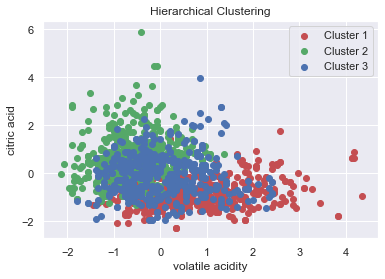

In [775]:
#visualize clustering
colors = 'rgbkcmy'

for i in np.unique(clustering.labels_):
    plt.scatter(X_scaled[clustering.labels_ == i, 0], X_scaled[clustering.labels_ == i, 1],
                color=colors[i], label='Cluster ' + str(i + 1))

plt.legend()
plt.title('Hierarchical Clustering')
plt.xlabel(X_columns[1])
plt.ylabel(X_columns[2])
plt.show()

From the graph above, we can tell that that clusters not clearly defined. Lets explore Agglormerative Clustering agin with PCA.

In [776]:
#evaluate model
labels = clustering.labels_
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.15774678821180266

# 2.1 Agglormerative Clustering with PCA

In [777]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
start_time = time.time()
clustering.fit(pc_X)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.09773826599121094 seconds ---


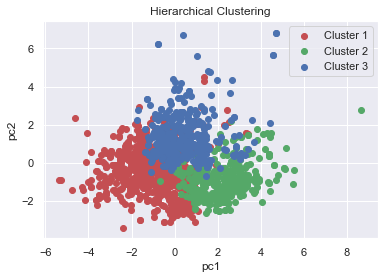

In [778]:
#visualize clustering
colors = 'rgbkcmy'

for i in np.unique(clustering.labels_):
    plt.scatter(pc_X[clustering.labels_ == i, 0], 
                pc_X[clustering.labels_ == i, 1],
                color=colors[i], label='Cluster ' + str(i + 1))

plt.legend()

plt.title('Hierarchical Clustering')
plt.xlabel(pc_columns[0])
plt.ylabel(pc_columns[1])
plt.show()

Although the clusters are not entirely segreggated, they appear to be clearer after applying PCA.

In [779]:
#evaluate model
labels = clustering.labels_
metrics.silhouette_score(pc_X, labels, metric='euclidean')

0.16027233625981466

# 3. Dbscan

In [780]:
from sklearn.cluster import DBSCAN

Higher min_samples or lower eps indicate higher density necessary to form a cluster.

In [781]:
dbscan = DBSCAN(eps=2, min_samples=7)
start_time = time.time()
clusters= dbscan.fit_predict(X_scaled)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.1216745376586914 seconds ---


In [782]:
np.unique(clusters)

array([-1,  0,  1], dtype=int64)

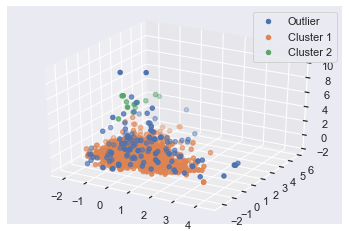

In [783]:
colors = 'rgbkcmy'
ax = plt.axes(projection='3d')

for i in np.unique(clusters):
    label = 'Outlier' if i == -1 else 'Cluster ' + str(i + 1)
    ax.scatter3D(X_scaled[clusters==i,0], X_scaled[clusters==i,1],X_scaled[clusters==i,4],
                #color=colors[i], 
                 label=label)

plt.legend()
plt.show()

In [784]:
#evaluate model
labels = dbscan.labels_
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.3437490618336084

# 3.1 Dbscan with PCA

In [785]:
dbscan = DBSCAN(eps=2, min_samples=7)
start_time = time.time()
clusters= dbscan.fit_predict(pc_X)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.07579708099365234 seconds ---


In [786]:
np.unique(clusters)

array([-1,  0,  1], dtype=int64)

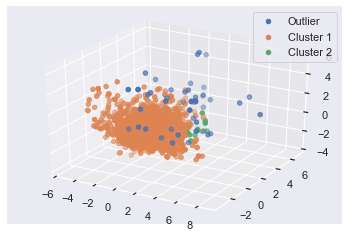

In [787]:
ax = plt.axes(projection='3d')

for i in np.unique(clusters):
    label = 'Outlier' if i == -1 else 'Cluster ' + str(i + 1)
    ax.scatter3D(pc_X[clusters==i,0], 
                 pc_X[clusters==i,1],
                 pc_X[clusters==i,2],
                 label=label)

plt.legend()
plt.show()

In [788]:
#evaluate model
labels = dbscan.labels_
metrics.silhouette_score(pc_X, labels, metric='euclidean')

0.4639392573515172